### Imports 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datapane as dp
import pygam

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

path = 'enter/path/here.csv' # enter your path to the Bikeshare dataset here!

### Load Data

In [3]:
df = pd.read_csv(path)
df.drop(['instant','casual','registered'],axis=1,inplace=True)
df.columns =['date','season','year','month','hour','is_holiday','weekday','is_workingday','weather','temp','temp_feel','humidity','wind','total']
df.head(3)

date  season  year  month  hour  is_holiday  weekday  is_workingday  \
0  2011-01-01       1     0      1     0           0        6              0   
1  2011-01-01       1     0      1     1           0        6              0   
2  2011-01-01       1     0      1     2           0        6              0   

   weather  temp  temp_feel  humidity  wind  total  
0        1  0.24     0.2879      0.81   0.0     16  
1        1  0.22     0.2727      0.80   0.0     40  
2        1  0.22     0.2727      0.80   0.0     32

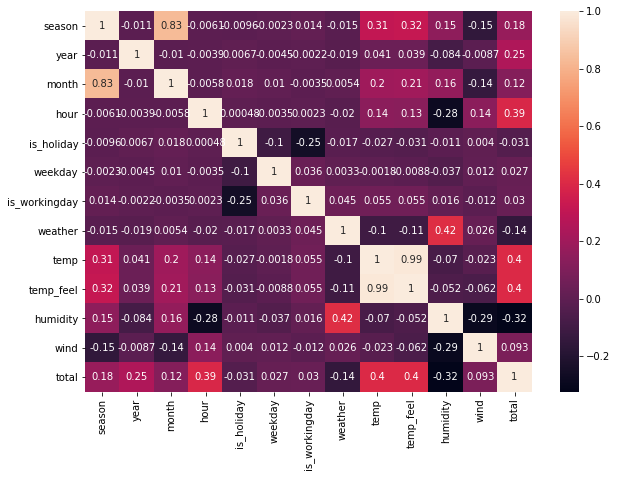

In [4]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True);

In [5]:
median_df = df[['hour','total']].groupby('hour').median().reset_index()

Bokeh version 2.0.0 is not supported, your plots may not display correctly, please install version ~=2.2.0
Folium version 0.11.0 is not supported, your plots may not display correctly, please install version >=0.12.0


Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/adam1/reports/median-bike-rentals-per-hour/ - you can edit and add additional text from the link

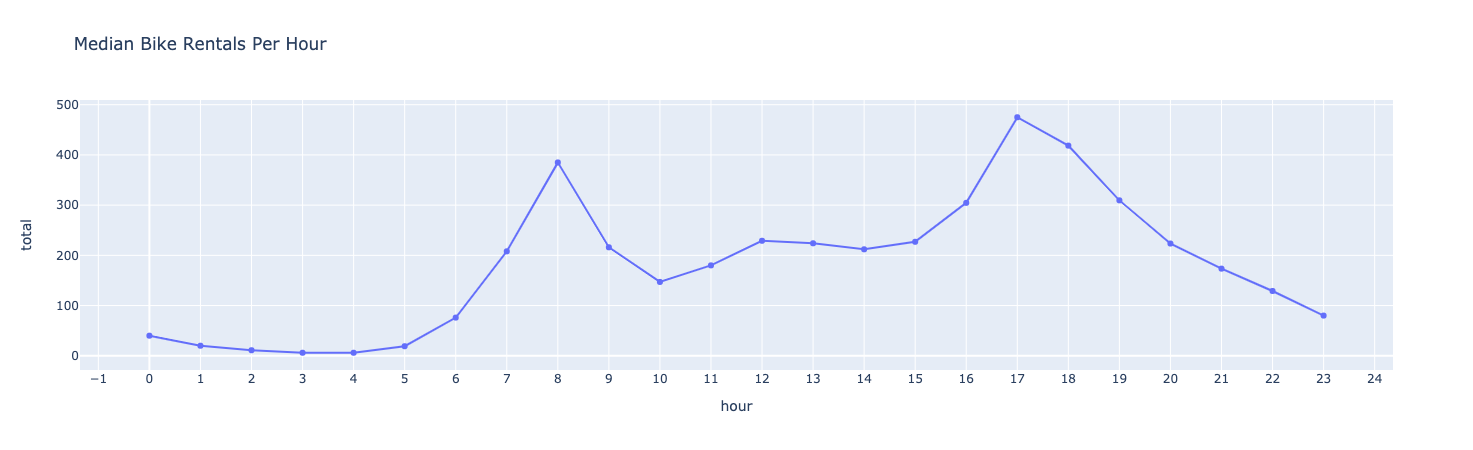

In [6]:
plot = px.scatter(data_frame=median_df,
                  x='hour',
                  y='total',
                  title='Median Bike Rentals Per Hour')
plot.data[0].update(mode='markers+lines')
plot.update_layout(xaxis={'dtick':1},showlegend=True)
report = dp.Report(dp.Plot(plot))
report.publish(name='Median Bike Rentals Per Hour',open=True,visibility=dp.Visibility.PUBLIC)
plot

In [7]:
median_df = df[['hour','total']].groupby('hour').median().reset_index()

### Linear Regression

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/adam1/reports/linear-regression-for-median-bike-rentals-per-hour/ - you can edit and add additional text from the link

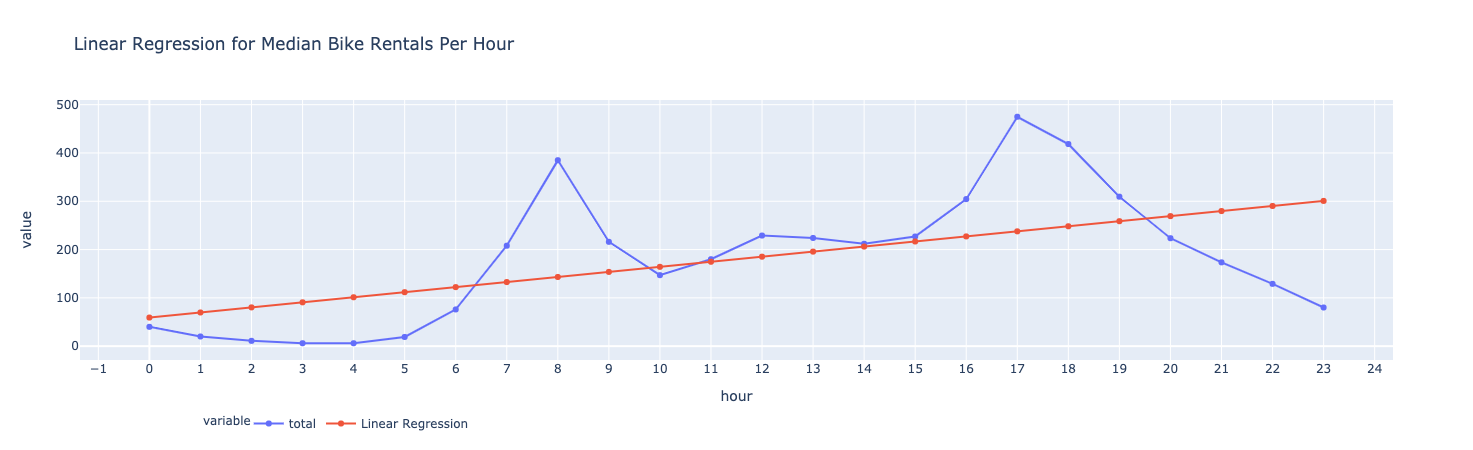

In [8]:
model=LinearRegression()
model.fit(median_df[['hour']],median_df['total'])
median_df['Linear Regression'] = model.predict(median_df[['hour']])

plot = px.scatter(data_frame=median_df,
                  x='hour',
                  y=['total','Linear Regression'],title='Linear Regression for Median Bike Rentals Per Hour')

plot.data[0].update(mode='markers+lines')
plot.data[1].update(mode='markers+lines')
plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.3,y=-.3))

dp.Report(dp.Plot(plot)).publish(name='Linear Regression for Median Bike Rentals Per Hour',open=True,visibility=dp.Visibility.PUBLIC)
plot

In [9]:
poly = PolynomialFeatures(30)
poly_df = pd.DataFrame(poly.fit_transform(median_df[['hour']]),columns = poly.get_feature_names())
poly_df.head(2)

1   x0  x0^2  x0^3  x0^4  x0^5  x0^6  x0^7  x0^8  x0^9  ...  x0^21  \
0  1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1  1.0  1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...    1.0   

   x0^22  x0^23  x0^24  x0^25  x0^26  x0^27  x0^28  x0^29  x0^30  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[2 rows x 31 columns]

In [10]:
vals = [1,3,5,10]
vals_col = []

In [11]:
for val in vals:
    n = val
    end = median_df.shape[0]-2

    model=LinearRegression()
    model.fit(poly_df.iloc[:end,:n+1],median_df['total'][:end])
    median_df[f'x^{n}'] = model.predict(poly.transform(median_df[['hour']])[:,:n+1])
    vals_col.append(f'x^{n}')

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/adam1/reports/polynomial-regression-on-median-bike-rentals-per-hour/ - you can edit and add additional text from the link

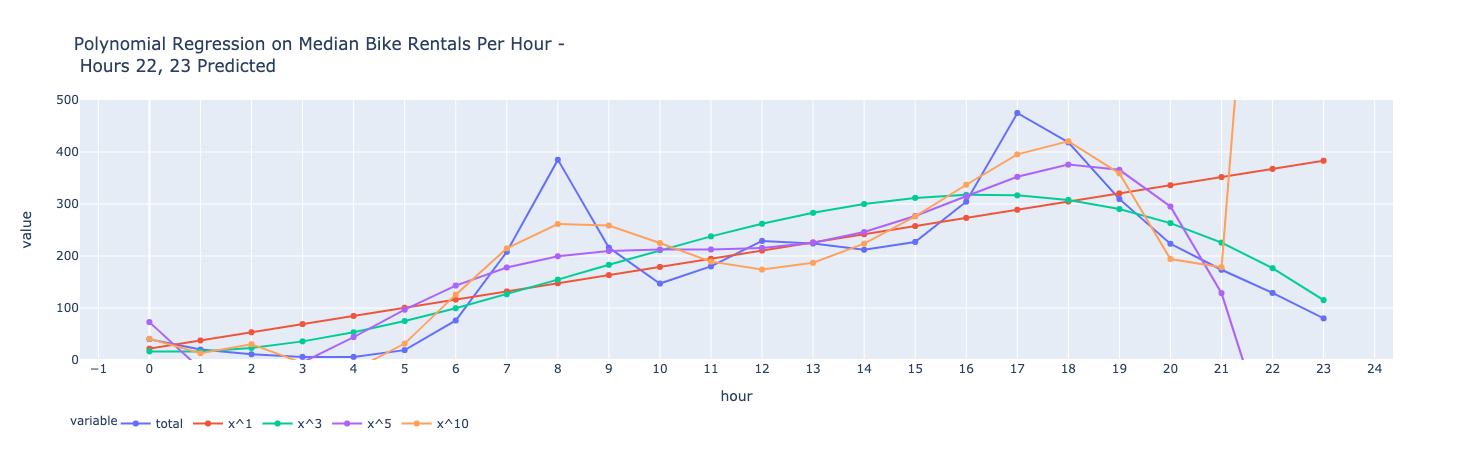

In [12]:
plot = px.scatter(data_frame=median_df,
                  x='hour',
                  y=['total']+vals_col,
                 title='Polynomial Regression on Median Bike Rentals Per Hour - <br> Hours 22, 23 Predicted')

for i in plot.data:
    i.update(mode='markers+lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.3,y=-.3))
plot.update_yaxes(range=[0,500])
dp.Report(dp.Plot(plot)).publish(name='Polynomial Regression on Median Bike Rentals Per Hour',open=True,visibility=dp.Visibility.PUBLIC)
plot

### GAM

In [13]:
median_df.head()

hour  total  Linear Regression        x^1        x^3        x^5       x^10
0     0   40.0          59.221667  21.879447  16.525692  72.854738  40.845094
1     1   20.0          69.722319  37.590062  16.506070 -17.316996  12.851935
2     2   11.0          80.222971  53.300678  23.237436 -32.790240  30.306729
3     3    6.0          90.723623  69.011293  35.811376  -4.611628  -5.517088
4     4    6.0         101.224275  84.721909  53.319475  44.004018 -19.045442

In [14]:
from pygam import GAM, LinearGAM, s, f, te

In [15]:
lams = np.logspace(-5,5,20)

In [16]:
end = median_df.shape[0]-2
splines = 12

In [17]:
#gam2 = GAM(s(0),n_splines=6,link='log').gridsearch(median_df[['hour']].iloc[:end].values,median_df['total'][:end].values,lam=lams)

In [18]:
gam = LinearGAM(s(0,n_splines=splines)).gridsearch(median_df[['hour']].iloc[:end].values,
                                               median_df['total'][:end].values,
                                               lam=lams)

100% (20 of 20) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [19]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       6.378
Link Function:                     IdentityLink Log Likelihood:                                  -203.7092
Number of Samples:                           22 AIC:                                              422.1746
                                                AICc:                                             431.2501
                                                GCV:                                             8429.1839
                                                Scale:                                           4190.1308
                                                Pseudo R-Squared:                                   0.8367
Feature Function                  Lam

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




In [20]:
median_df[f'GAM {splines} splines'] = gam.predict(median_df[['hour']])

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/adam1/reports/gam-on-median-bike-rentals-per-hour/ - you can edit and add additional text from the link

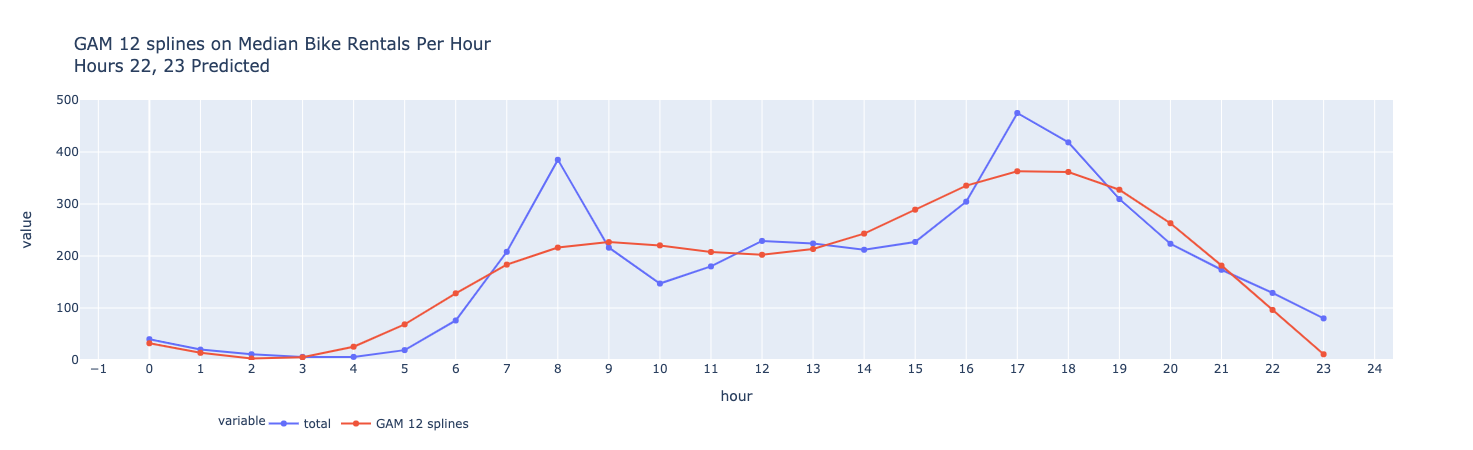

In [21]:
plot = px.scatter(data_frame=median_df,
                  x='hour',
                  y=['total',f'GAM {splines} splines'],
                 title=f'GAM {splines} splines on Median Bike Rentals Per Hour <br>Hours 22, 23 Predicted')

for i in plot.data:
    i.update(mode='markers+lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.3,y=-.3))
plot.update_yaxes(range=[0,500])
dp.Report(dp.Plot(plot)).publish(name='GAM on Median Bike Rentals Per Hour',open=True,visibility=dp.Visibility.PUBLIC)
plot

### Exploring Splines

In [22]:
coefs = gam.coef_

In [24]:
matrix = pd.DataFrame(gam._modelmat(median_df[['hour']].iloc[:end].values).toarray())

In [25]:
matrix.shape

(22, 13)

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/adam1/reports/unweighted-spline-functions-on-median-bike-rentals-per-hour/ - you can edit and add additional text from the link

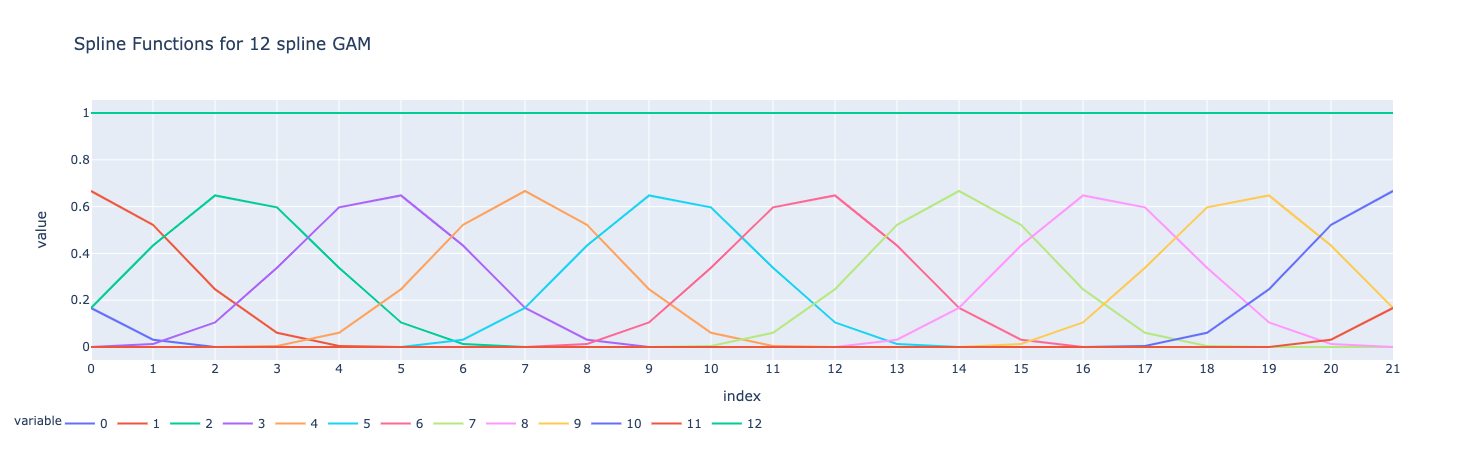

In [26]:
plot = px.scatter(data_frame=matrix,
                  x= matrix.index,
                  y= matrix.columns,
                 title=f'Spline Functions for {splines} spline GAM')

for i in plot.data:
    i.update(mode='lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.52,y=-.3))
#plot.update_yaxes(range=[0,500])
dp.Report(dp.Plot(plot)).publish(name='Unweighted Spline Functions on Median Bike Rentals Per Hour',open=True,visibility=dp.Visibility.PUBLIC)
plot

In [27]:
scaled_matrix = matrix*coefs

Publishing document and associated data - *please wait...*

Your report doesn't contain any text - did you know you can add text to your report once published?

Your report only contains a single element - did you know you can add multiple plots and tables to a report, add text to it and export directly to Medium once published?

Report successfully published at https://datapane.com/u/adam1/reports/weighted-spline-functions-on-median-bike-rentals-per-hour/ - you can edit and add additional text from the link

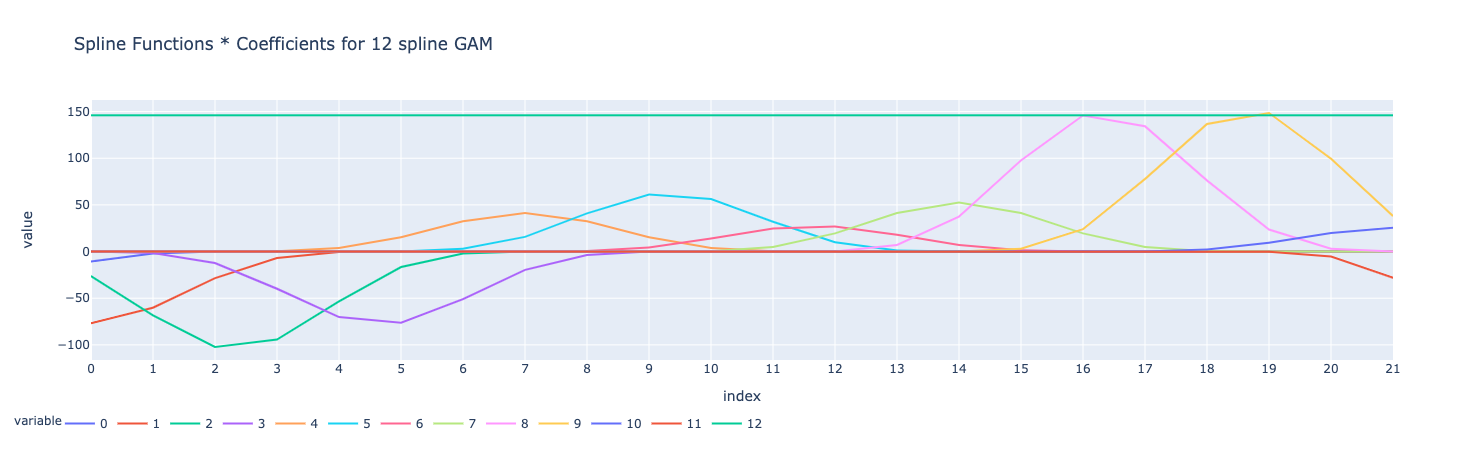

In [28]:
plot = px.scatter(data_frame=scaled_matrix,
                  x= scaled_matrix.index,
                  y= scaled_matrix.columns,
                 title=f'Spline Functions * Coefficients for {splines} spline GAM')

for i in plot.data:
    i.update(mode='lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.52,y=-.3))
#plot.update_yaxes(range=[0,500])
dp.Report(dp.Plot(plot)).publish(name='Weighted Spline Functions on Median Bike Rentals Per Hour',open=True,visibility=dp.Visibility.PUBLIC)
plot

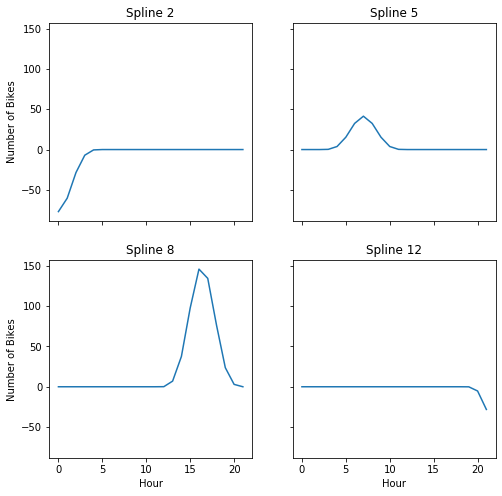

In [29]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize = (8,8),sharey=True, sharex=True)
(matrix*coefs)[1].plot(title = 'Spline 2', ax=ax[0,0])
(matrix*coefs)[4].plot(title = 'Spline 5', ax=ax[0,1])
(matrix*coefs)[8].plot(title = 'Spline 8', ax=ax[1,0])
(matrix*coefs)[11].plot(title = 'Spline 12', ax=ax[1,1])
plt.setp(ax[-1, :], xlabel='Hour')
plt.setp(ax[:, 0], ylabel='Number of Bikes')
plt.show()

In [1]:
#https://stackoverflow.com/questions/37379609/extract-knots-basis-coefficients-and-predictions-for-p-splines-in-adaptive-smo
#https://github.com/dswah/pyGAM/blob/master/pygam/pygam.py
#https://stackoverflow.com/questions/49570452/is-it-possible-to-specify-lower-bound-in-response-variable-during-smooth-with-ga